In [ ]:
# Import libraries - Read file - Display first few rows
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
iris = pd.read_csv('Unit06 iris.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Remove "species" column for clustering
df = iris.drop('species', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Normalize the datase & Perform K-means clustering (K=3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform (df)
clusterNum=3
k_means = KMeans(n_clusters = clusterNum, init="k-means++", random_state=42)
k_means.fit(df)
iris["cluster"] = k_means.labels_
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,species_label
0,5.1,3.5,1.4,0.2,setosa,1,0
1,4.9,3.0,1.4,0.2,setosa,2,0
2,4.7,3.2,1.3,0.2,setosa,2,0
3,4.6,3.1,1.5,0.2,setosa,2,0
4,5.0,3.6,1.4,0.2,setosa,1,0


In [ ]:
# Map the species to integers for comparison
iris["species_label"]=iris["species"].map({"setosa":0,"versicolor":1,"virginica":2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,species_label
0,5.1,3.5,1.4,0.2,setosa,1,0
1,4.9,3.0,1.4,0.2,setosa,2,0
2,4.7,3.2,1.3,0.2,setosa,2,0
3,4.6,3.1,1.5,0.2,setosa,2,0
4,5.0,3.6,1.4,0.2,setosa,1,0


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(iris["species_label"],iris["cluster"])
print(conf_matrix)

[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


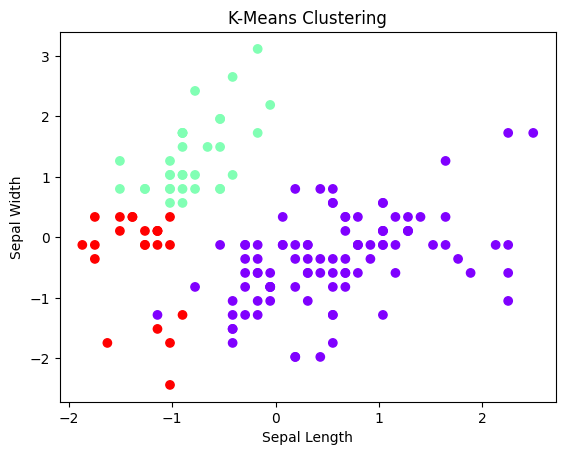

In [ ]:
# Visualize the clusters
plt.scatter(df[:,0],df[:,1],c=iris["cluster"],cmap="rainbow")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering")
plt.show()